<a href="https://colab.research.google.com/github/Anastasiia-cn/Python_for_analytics_HW/blob/main/Kabanova_%D0%A2%D0%B2%D0%BE%D1%80%D1%87%D0%B5_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D1%82%D0%B8%D1%87%D0%BD%D0%B5_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Набір даних "Yulu" містить інформацію про попит на спільні електровелосипеди в Індії, що надаються провідним індійським постачальником мікромобільності Yulu. Ця компанія пропонує унікальні транспортні засоби для щоденних поїздок з метою усунення транспортних заторів в Індії та забезпечення безпечного, зручного та доступного рішення для пересування. Зони Yulu розташовані в оптимальних місцях, включаючи станції метро, автобусні зупинки, офісні простори, житлові райони та корпоративні офіси, щоб полегшити поїздки на перші та останні кілометри.

Останнім часом Yulu зіткнулася зі значними зниженнями доходів, тому компанія звернулася до консалтингової фірми з метою зрозуміти, від яких факторів залежить попит на ці спільні електровелосипеди, особливо на індійському ринку.

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Python_DA_course_HW/viz/data/yulu_rental.csv')

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 1. У який сезон найчастіше користуються прокатом велосипедів?
**season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)

In [29]:
#створено нову змінну, у якій df згруповано за сезоном та для кожного сезону пораховано загальна кількість орендованих велосипедів
season_count_df = df.groupby('season')['count'].sum().reset_index()
season_count_df

,season,count
0,1,312498
1,2,588282
2,3,640662
3,4,544034


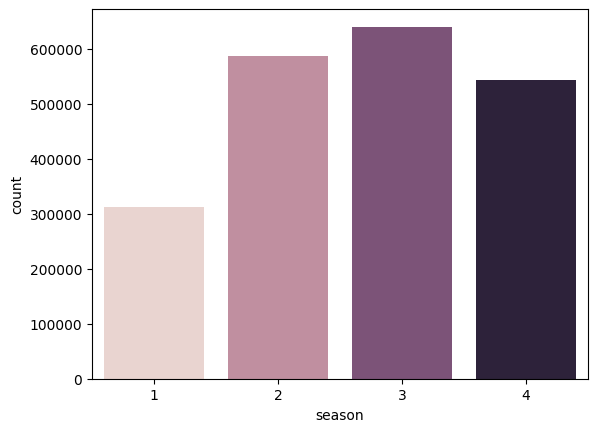

In [6]:
sns.barplot(data=season_count_df, x='season', y='count', hue='season', legend=False);

З отрманого графіка можна побачити, що найчастіше прокатом користуються під час осені. На другому місті літо, на третьому - зима, на четвертому - весна.

Порівняти registered та casual користувачів в залежності від сезону.

In [28]:
#створено нову змінну, згрупувавши df за сезоном та порахувавши кількість прокатів для registered та casual.
#за допомогою функції melt() перетворено дата фрейм так, щоб в нас була колонка user_type та відповідні їй значення сезону та кількість арендованих велосипедів.
season_count_user_type_df = df.groupby('season')[['registered', 'casual']].sum().reset_index().melt(id_vars='season', var_name=
                                                                                                    'user_type', value_name='count')
season_count_user_type_df

,season,user_type,count
0,1,registered,270893
1,2,registered,458610
2,3,registered,497944
3,4,registered,465894
4,1,casual,41605
5,2,casual,129672
6,3,casual,142718
7,4,casual,78140


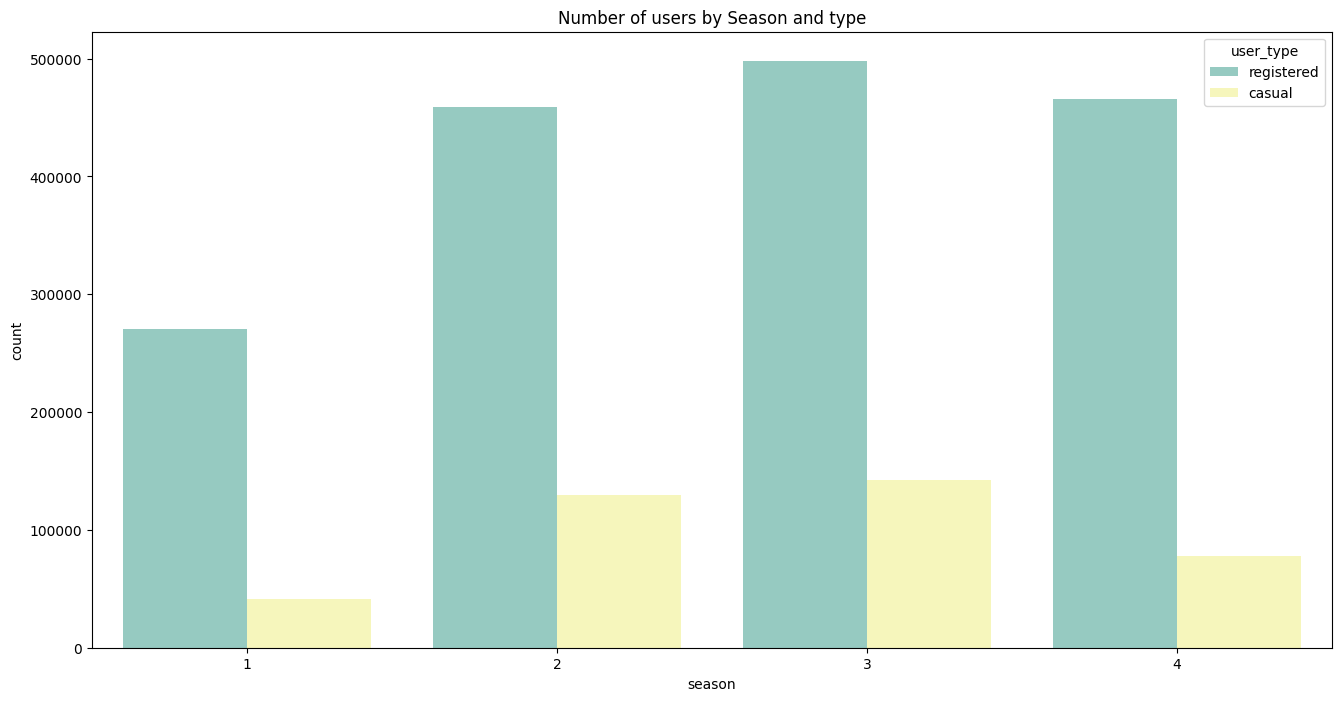

In [8]:
plt.figure(figsize=(16,8))

sns.barplot(season_count_user_type_df, x='season', y='count', hue='user_type', palette='Set3')

plt.title('Number of users by Season and type');

Registered користувачі значно перевищують casual. Розташування сезонів в залежності від частоти використання для registered користувачів трохи відрізняється від результатів загальної кількості прокату: 1 місце - осінь, 2 місце - зима, 3 місце - літо, 4 місце - весна.

## 2. Як залежить оренда велосипедів влітку та восени від температури?

In [27]:
#створено нову змінну, що враховує дані для літа та осені
season23_temp_df = df[(df['season'] == 2) | (df['season'] == 3)].reset_index()

<Figure size 1600x800 with 0 Axes>

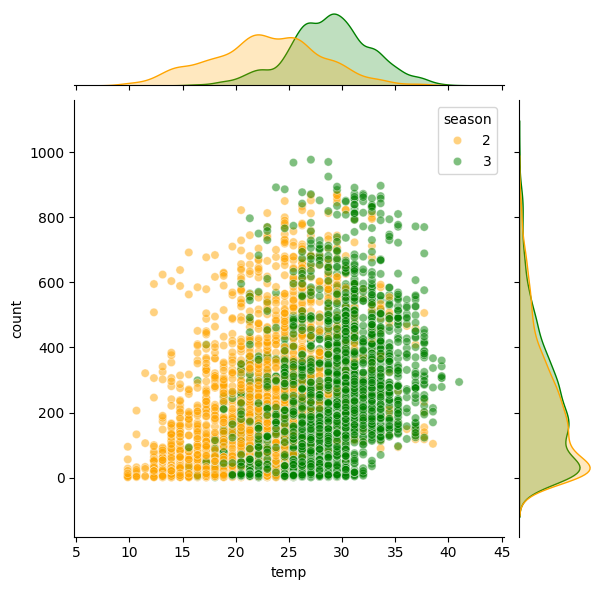

In [37]:
plt.figure(figsize=(16,8))
sns.jointplot(data=season23_temp_df, x='temp', y='count', hue='season', alpha=.5, palette=['orange', 'green']);

Існує великий розкид точок для різних температур. Помітні викиди, які варто дослідити додатково.\
Найбільші значення прокату під час літа можна спостерігати при температурі 20-25С, а для осені в діапазоні 25-33С.\
З графіків розподілу можна побачити, що розподіл точок майже однаковий, проте в попередньому дослідженні можна побачити, що найчастіше прокатом користуються під час осені.

## 3. Як розподілені значення кількості арендованих велосипедів в залежності від погоди?

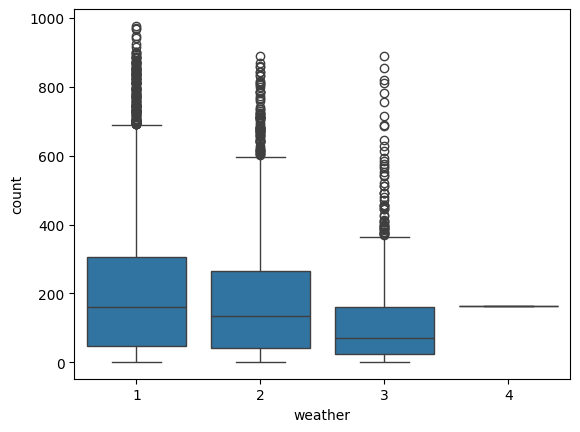

In [10]:
sns.boxplot(data=df, x='weather', y='count');

Розглянемо 1й ящик:\
Нижня межа ящика Q1 = 50, що означає, що 25% найменших значень знаходяться нижче цієї точки.\
Медіана становить 180.\
Верхня межа ящика Q3 = 310, що означає, що 25% найбільших значень знаходяться вище цієї точки.\
Верхній вус ящика має довжину до 690, що свідчить про наявність значної кількості значень, що відхиляються від основного розподілу.\
У даному випадку ми спостерігаємо, що кількість орендованих велосипедів має значний розмах від 0 до 690, а також велику кількість викидів. Це може свідчити про наявність аномалій або несподіваних значень у даних, які варто дослідити окремо та знайти джерело їх появи, це дасть можливість зрозуміти, чи варто їх враховувати при подальшому аналізі.

4й ящик є горизонтальною лінією, це одначає, що всі значення для погоди 4го типу мають однакове значення.\
Нижче виведено значення для погоди 4го типу, ми можемо побачити, що був тільки один день з такою погодою.

In [18]:
df[df['weather'] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012-01-09
